# Checkins Clustering
[Data Source](https://archive.org/details/201309_foursquare_dataset_umn)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import MeanShift

%matplotlib inline

## Read data

In [2]:
na_value = '                   '
df = pd.read_csv("data/checkins.dat", delimiter='|', low_memory=False, skiprows=[1, -1], \
                 usecols=[3,4], na_values=na_value)

In [3]:
df.dropna(inplace=True)
df.columns = df.columns.str.strip()

df.head(10)

,latitude,longitude
1,38.895112,-77.036366
3,33.800745,-84.410520
7,45.523452,-122.676207
9,40.764462,-111.904565
10,33.448377,-112.074037
11,32.221743,-110.926479
12,40.650000,-73.950000
13,33.448377,-112.074037
15,33.414768,-111.909309
18,42.358431,-71.059773


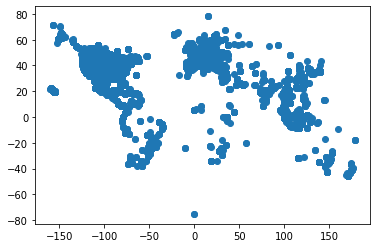

In [4]:
plt.scatter(df.longitude, df.latitude)

## Clustering first n samples

In [5]:
size = 100000

In [6]:
clusterizer = MeanShift(bandwidth=0.1, n_jobs=-1)
clusters = clusterizer.fit_predict(df.iloc[:size])

## Select most polular clusters(>15 items)

In [7]:
_, cluster_counts = np.unique(clusters, return_counts=True)

In [8]:
real_cluster = np.argwhere(cluster_counts > 15)

## Calculate centers of clusters

In [9]:
def calculate_center(cluster_index):
    indexes = np.argwhere(clusters == cluster_index)[:,0]
    temp = df.iloc[indexes]
    return temp.mean(axis=0)

In [11]:
cluster_centers = np.apply_along_axis(calculate_center, arr=real_cluster, axis=1)

## Calculate distances to offices

In [12]:
offices = np.array([
    [33.751277, -118.188740],
    [25.867736, -80.324116],
    [51.503016, -0.075479],
    [52.378894, 4.885084],
    [39.366487, 117.036146],
    [-33.868457, 151.205134]
])

In [13]:
def distance_to_office(office_coords):
    return np.linalg.norm(cluster_centers - office_coords, axis=1)

In [14]:
distances_to_offices = np.apply_along_axis(distance_to_office, axis=1, arr=offices)

## Select top 20

In [15]:
def flatten_index_to_cluster(index):
    a = int(index / cluster_centers.shape[0])
    return (a, index - a * cluster_centers.shape[0])

In [16]:
flatten_min = np.argsort(distances_to_offices.ravel())[:20]
office_index, center_index = np.vectorize(flatten_index_to_cluster)(flatten_min)

In [17]:
nearest_center = cluster_centers[center_index[0]]
print(f"Nearest center: {nearest_center}")

Nearest center: [-33.86063043 151.20477593]


In [18]:
def write_answer(center):
    with open("answer.txt", 'w') as file:
        file.write(" ".join([str(v) for v in center]))

write_answer(nearest_center)